In [2]:
#Importing the dependecies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
%matplotlib inline
from citipy import citipy

In [3]:
# Loading the file
file1 = "impacts.csv"
file2 = "meteorite-landings.csv"

# Reading the meteor csv data file 
impacts = pd.read_csv(file1)

# Displaying the data table for preview
impacts.head(5)

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [4]:
asteroids = impacts.rename(columns ={"Object Name": "Name"})
asteroids.head()

,Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [5]:
#Dropping some unecessary columns 
asteroids = asteroids.drop(columns = ["Maximum Torino Scale", "Asteroid Magnitude"])
asteroids.head()

,Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,0.007,-8.31,-8.31
1,2013 YB,2017,2046,23,7.600000e-05,8.98,0.002,-6.60,-6.96
2,2008 US,2017,2062,30,1.600000e-05,18.33,0.002,-6.48,-6.87
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,0.016,-6.83,-6.95
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,0.497,-3.85,-4.30


In [6]:
# Reading the meteor csv data file 
meteor = pd.read_csv(file2)
meteor.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [7]:
meteor = meteor.rename(columns ={"recclass": "type",
                                 "fall": "discovery",
                                 "nametype": "appearance",
                                 "reclat": "lat",
                                 "reclong": "long",
                                 "GeoLocation": "coordinates"})
meteor.head()

,name,id,appearance,type,mass,discovery,year,lat,long,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [8]:
#Dropping some unecessary columns 
meteor = meteor.drop(columns = ["id", "coordinates"])
meteor.head()

,name,appearance,type,mass,discovery,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [9]:
meteor_count = meteor["year"].value_counts()
meteor_count.head()

2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
Name: year, dtype: int64

In [10]:
# Remove the rows with missing data
clean_meteor_df = meteor.dropna(how="any")
clean_meteor_df.count()

name          38116
appearance    38116
type          38116
mass          38116
discovery     38116
year          38116
lat           38116
long          38116
dtype: int64

In [11]:
clean_meteor_df.head()

,name,appearance,type,mass,discovery,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [12]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_meteor_df = meteor.groupby(['year'])

# In order to be visualized, a data function must be used...
grouped_meteor_df.head(10)

,name,appearance,type,mass,discovery,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
5,Adhi Kot,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000
6,Adzhi-Bogdo (stone),Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667
7,Agen,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667
8,Aguada,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333
9,Aguila Blanca,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000


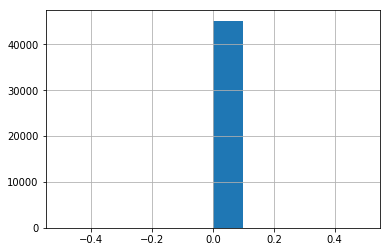

In [13]:
plt.figure();
grouped_meteor_df['year'].diff().hist()

In [14]:
# year = grouped_meteor_df["year"]
# x_axis = np.arange(len(year))

In [15]:
# plt.bar(x_axis, year, color='g', alpha=0.5, align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["year"])

(array([3.0000e+00, 1.4000e+01, 6.9000e+01, 2.7700e+02, 9.6900e+02,
        2.5790e+03, 5.8010e+03, 1.0379e+04, 1.5122e+04, 1.7920e+04,
        1.7298e+04, 1.3536e+04, 8.6630e+03, 4.6080e+03, 1.8750e+03,
        6.4100e+02, 2.0000e+02, 3.7000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 0.15026293,  0.64387908,  1.13749522,  1.63111136,  2.12472751,
         2.61834365,  3.11195979,  3.60557594,  4.09919208,  4.59280822,
         5.08642437,  5.58004051,  6.07365665,  6.5672728 ,  7.06088894,
         7.55450508,  8.04812123,  8.54173737,  9.03535351,  9.52896966,
        10.0225858 ]),
 <a list of 20 Patch objects>)

/Users/mansoormalik/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


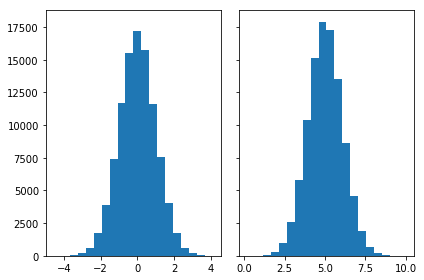

In [17]:
histo = np.random.seed(19680801)


# Generate data and plot a simple histogram
# To generate a 1D histogram we only need a single vector of numbers. For a 2D histogram we’ll need a second vector. We’ll generate both below, and show the histogram for each vector.

N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)


NameError: name 'PercentFormatter' is not defined

/Users/mansoormalik/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


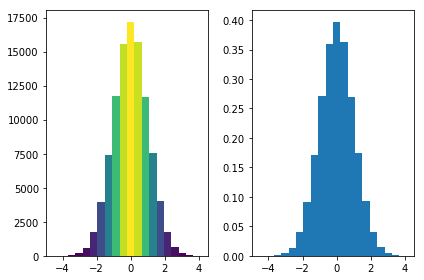

In [18]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))